In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
numbers = [i for i in range(0, 100)]

In [8]:
# Стандартное отклонение можно посчитать так
np.std(numbers, ddof=1)

29.011491975882016

In [93]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/Stats_projects/Stats_project_1/games.csv')

In [94]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [96]:
data.isnull().sum(axis = 0)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [97]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [98]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [99]:
data.shape

(16598, 11)

In [100]:
data = data.dropna()

In [101]:
data.shape

(16291, 11)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

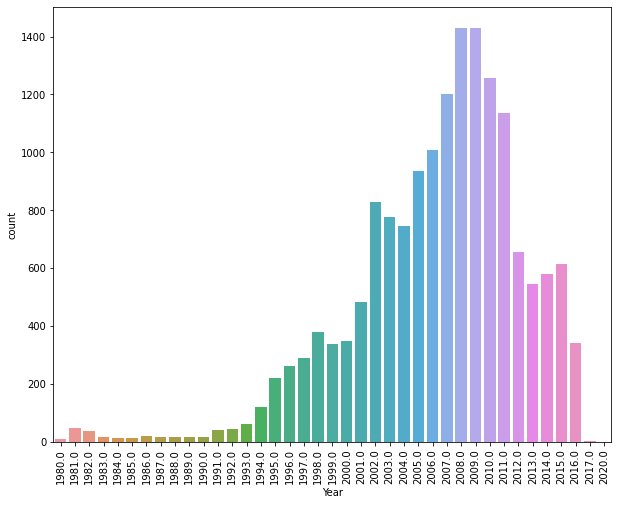

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='Year')
plt.xticks(rotation=90)

In [102]:
data['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [28]:
data['Year'].median()

2007.0

In [30]:
data['Year'].mode()

0    2009.0
dtype: float64

In [29]:
np.std(data['Year'])

5.832233209586327

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

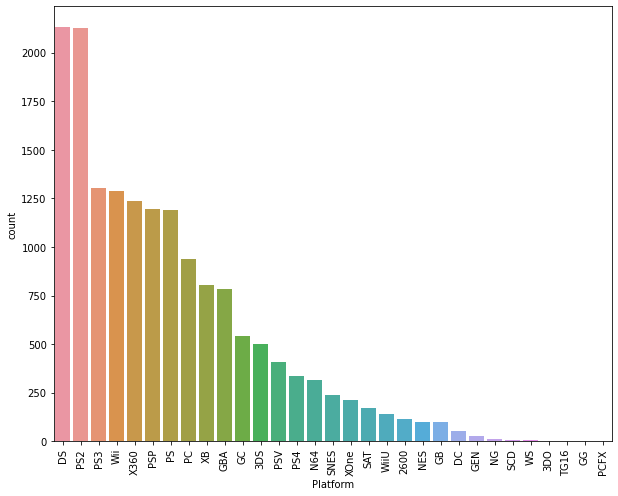

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='Platform', order = data['Platform'].value_counts().index)
plt.xticks(rotation=90)

In [123]:
data['Platform'].value_counts(normalize=True).mul(100).to_frame().query('Platform > 7').sort_values('Platform', ascending=False).index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype='object')

In [35]:
data['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Westwood Studios                   1
Genterprise                        1
Marvel Entertainment               1
Culture Publishers                 1
TalonSoft                          1
Name: Publisher, Length: 576, dtype: int64

In [142]:
data_nintendo = data[data['Publisher'] == 'Nintendo']

In [125]:
data_nintendo.median()

Rank            3801.864943
Year            2003.830460
NA_Sales           1.172055
EU_Sales           0.601006
JP_Sales           0.653721
Other_Sales        0.136767
Global_Sales       2.563836
dtype: float64

In [143]:
data_nintendo.mean()

Rank            3801.864943
Year            2003.830460
NA_Sales           1.172055
EU_Sales           0.601006
JP_Sales           0.653721
Other_Sales        0.136767
Global_Sales       2.563836
dtype: float64

In [144]:
np.std(data_nintendo)

Rank            3966.415861
Year               7.770782
NA_Sales           2.987764
EU_Sales           1.742700
JP_Sales           1.062346
Other_Sales        0.463837
Global_Sales       5.672845
dtype: float64

In [146]:
data_nintendo_japan = data_nintendo[['JP_Sales', 'Genre']]
data_nintendo_japan.head()

,JP_Sales,Genre
0,3.77,Sports
1,6.81,Platform
2,3.79,Racing
3,3.28,Sports
4,10.22,Role-Playing


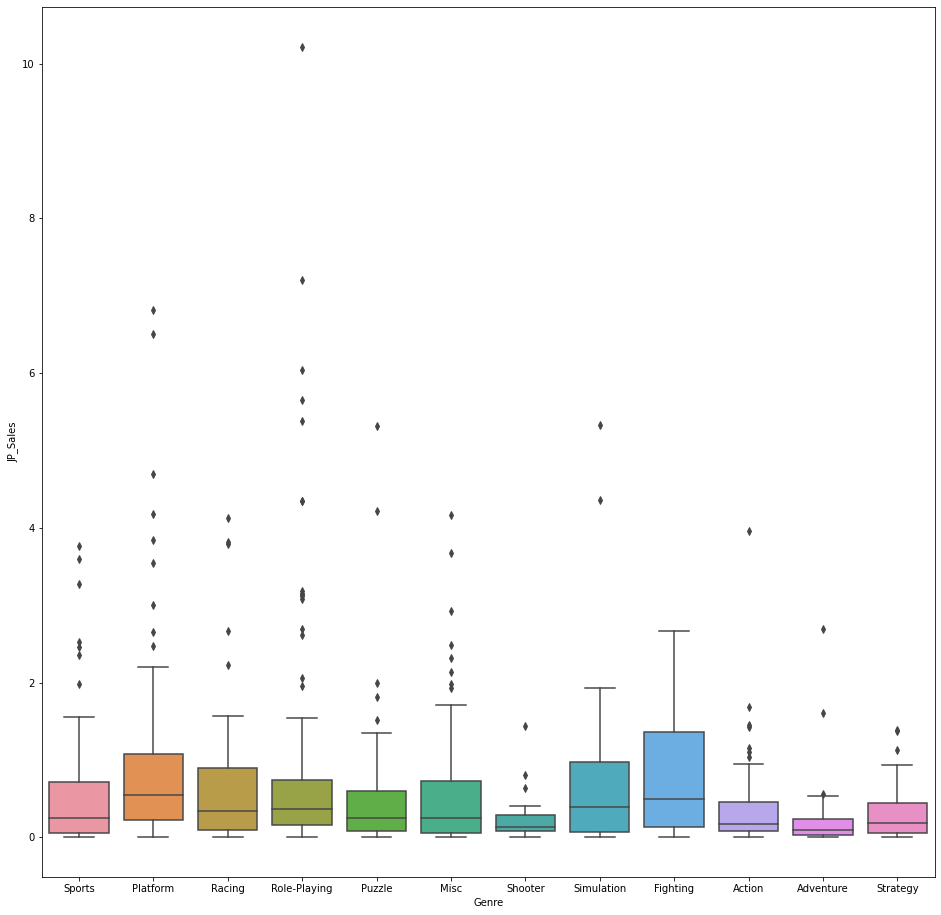

In [147]:
plt.figure(figsize=(16, 16))
sns.boxplot(data=data_nintendo_japan, x="Genre", y="JP_Sales") 
# [(data_nintendo_japan['Genre'] == 'Strategy') | (data_nintendo_japan['Genre'] == 'Puzzle')]

In [148]:
st.iqr(data_nintendo_japan['JP_Sales'])

0.65

In [151]:
data_nintendo_japan['JP_Sales'].quantile(0.75) - data_nintendo_japan['JP_Sales'].quantile(0.25)

0.65

In [79]:
data_select_genres = data.loc[(data['Genre'] == 'Fighting')  
                              | (data['Genre'] == 'Simulation') 
                              | (data['Genre'] == 'Platform') 
                              | (data['Genre'] == 'Racing') 
                              | (data['Genre'] == 'Sports')]
data_select_genres

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...,...
16587,16590,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

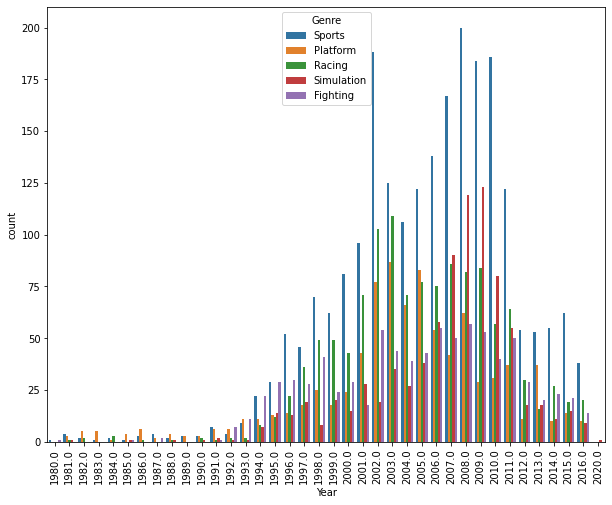

In [87]:
plt.figure(figsize=(10,8))
data_select_genres.groupby(['Year', 'Genre']).agg({'Global_Sales':'sum'})
sns.countplot(data=data_select_genres, x="Year", hue="Genre")
plt.xticks(rotation=90)

In [153]:
data_select_genres_2_option = data.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")

In [156]:
data_select_genres_2_option_by_genres = data_select_genres_2_option.groupby(['Year', 'Genre'], as_index=False).agg({'Global_Sales':'sum'})
data_select_genres_2_option_by_genres

,Year,Genre,Global_Sales
0,1980.0,Fighting,0.77
1,1980.0,Sports,0.49
2,1981.0,Platform,6.93
3,1981.0,Racing,0.48
4,1981.0,Simulation,0.45
...,...,...,...
160,2016.0,Platform,2.07
161,2016.0,Racing,1.64
162,2016.0,Simulation,0.39
163,2016.0,Sports,14.60


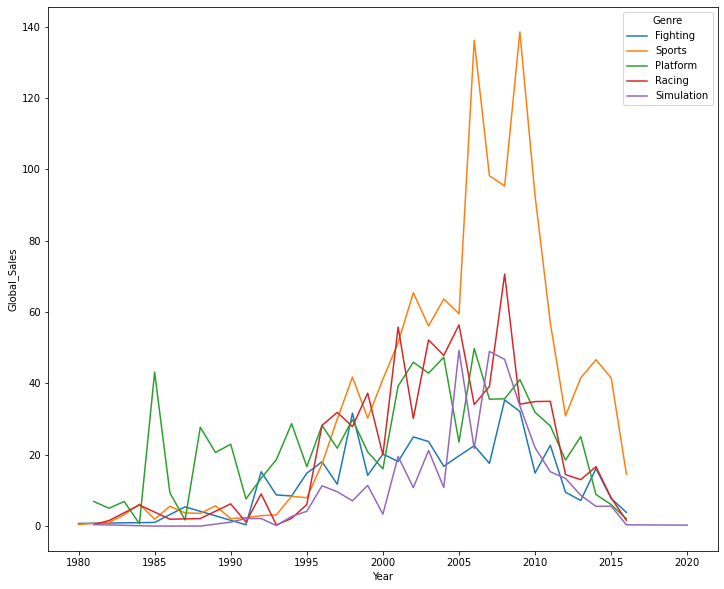

In [158]:
plt.figure(figsize=(12,10))
sns.lineplot(data=data_select_genres_2_option_by_genres, x ='Year', y ='Global_Sales', hue ='Genre')